<a href="https://colab.research.google.com/github/liachicue/Recognition_CAPTCHA/blob/main/CAPTCHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación de un conjunto de algoritmos de clasificación para el reconocimiento óptico de caracteres en códigos CAPTCHA**

*Aprendizaje de Máquina*

*Universidad Tecnológica de Pereira* 

* Lia Natalia Chicue Garcia 
 lia.chicue@utp.edu.co

* Jhunior Villamil Arango
 j.villamil@utp.edu.co

* Michell Guevara Gaviria
 michell.guevara@utp.edu.co
 
* Margie Silvana Getial Getial
 silvana.getial@utp.edu.co







*2021-II*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import  PCA
from ipywidgets import  interact
from sklearn.svm import SVC 
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  r2_score,mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import scale
from sklearn.linear_model import BayesianRidge, LogisticRegression
from ipywidgets import  interact, widgets
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dfHU.xlsx to dfHU.xlsx


In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
dfHU.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Label
0,0.478096,0.167485,0.030459,0.014753,3.070093e-04,0.005919,-5.960681e-05,49
1,0.530469,0.219689,0.037697,0.020592,5.678459e-04,0.009533,-8.189498e-05,49
2,0.314863,0.001341,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,43
3,0.316572,0.024231,0.000063,0.000028,-1.150940e-09,0.000004,1.712274e-10,56
4,0.285561,0.025362,0.002005,0.001924,3.539768e-06,0.000134,-1.321225e-06,51


In [ ]:
targets = dfHU["Label"]
ASCII_Y = targets.tolist()
Char_lista = [chr(simbolo) for simbolo in ASCII_Y]
y = pd.Series(Char_lista)
dfHU["Label"] = y
dfHU.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Label
0,0.478096,0.167485,0.030459,0.014753,3.070093e-04,0.005919,-5.960681e-05,1
1,0.530469,0.219689,0.037697,0.020592,5.678459e-04,0.009533,-8.189498e-05,1
2,0.314863,0.001341,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,+
3,0.316572,0.024231,0.000063,0.000028,-1.150940e-09,0.000004,1.712274e-10,8
4,0.285561,0.025362,0.002005,0.001924,3.539768e-06,0.000134,-1.321225e-06,3


In [ ]:
X = dfHU.drop(columns=["Label"])
X.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
0,0.478096,0.167485,0.030459,0.014753,3.070093e-04,0.005919,-5.960681e-05
1,0.530469,0.219689,0.037697,0.020592,5.678459e-04,0.009533,-8.189498e-05
2,0.314863,0.001341,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
3,0.316572,0.024231,0.000063,0.000028,-1.150940e-09,0.000004,1.712274e-10
4,0.285561,0.025362,0.002005,0.001924,3.539768e-06,0.000134,-1.321225e-06


In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
X = dfHU.drop(columns=["Label"])
y = dfHU["Label"]
print(y.unique())

[49 43 56 51 61 63 48 42 57 50 54 45 55 52 53]


## Modelos Lineales

### Bayesiano

In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
X = dfHU.drop(columns=["Label"]).values
y = dfHU["Label"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 123)


@interact(CantBase = (1,100,3), Alfa_Param = (1.,100.,3.), Lambda_Param = widgets.FloatSlider(min=1e-4, max=1, step=0.001, value=0.1,readout_format='.4f'))
def Experimeto1(CantBase,Alfa_Param,Lambda_Param):

  # Matriz de Vandermode para emular la función base Polinomial de orden M
  Ntr, D = Xtrain.shape
  Nte, D = Xtest.shape
  
  # Definimos la cantidad de funciones base
  
  PHI_train = np.zeros((Ntr,(CantBase+1)*D))
  
  PHI_test = np.zeros((Nte,(CantBase+1)*D))
  
  # Proyectemos cada vector (observaciones) de D=6 para armar nuestra matriz de diseño
  for n in range(0,len(ytrain)):
    # Indexamos la observacion n-ésima
    x_n = Xtrain[n,:]
    # proyectamos este x_n utilizando la función base
    phi_xn = np.vander(x_n,CantBase+1, increasing=True)
    PHI_train[n,:] = phi_xn.flatten()
    
  for n in range(0,len(ytest)):
    # Indexamos la observacion n-ésima
    x_n = Xtest[n,:]
    # proyectamos este x_n utilizando la función base
    phi_xn = np.vander(x_n,CantBase+1, increasing=True)
    PHI_test[n,:] = phi_xn.flatten()
  
  init = [Alfa_Param,Lambda_Param]
  # Instanciemos nuestros modelo Bayesiano
  modelReg = BayesianRidge(tol = 1e-6, fit_intercept=False, compute_score=True, alpha_init=Alfa_Param, lambda_init=Lambda_Param)
  
  # Creemos entonces nuestros parámetros iniciales del problema alpha y lambda
  modelReg.fit(PHI_train,ytrain)
  
  ymean_test, ystd_test = modelReg.predict(PHI_test, return_std=True)  # Realizamos la predicción
  
  print(ymean_test)
  print(ystd_test)

  plt.plot(ytest,'-r')
  plt.plot(ymean_test,'-b')
  plt.fill_between(np.linspace(0,len(ytest),len(ytest)),ymean_test-ystd_test,ymean_test+ystd_test,color='pink',alpha=0.5)
  plt.legend(('Observaciones','Datos','Std predictiva'))

  
  titulo = "$\\alpha$_init$ = {:.2f},\\ \\lambda$_ini$={}$".format(Alfa_Param,Lambda_Param)
  

  plt.title(titulo)
  plt.show()
  
  print('Parámetro Alpha:', modelReg.alpha_)
  print('Parámetro lambda:', modelReg.lambda_)
  print('Parámetro L:', modelReg.scores_[-1])


interactive(children=(IntSlider(value=49, description='CantBase', min=1, step=3), FloatSlider(value=49.0, desc…

### Mínimos Cuadrados 

In [ ]:
def Norm_Val(Y):
    n=Y.values.shape[0]
    m=Y.unique().shape[0]
    T = np.tile(np.zeros(m),(n,1))

    for i in range(0,n):
        for j in range(0,m):
              if Y.values[i]==j:
                  T[i,j]=1
    return T

def Modelo_MinCuadrados(DF, column, Xtrain,Xtest,ytrain,ytest):
  Ytrain_1 = Norm_Val(ytrain)
  Xtildetrain = np.concatenate((np.ones((ytrain.shape[0],1)),Xtrain), axis = 1) #Vector de unos de 40*6 
  Xtildetest = np.concatenate((np.ones((ytest.shape[0],1)),Xtest), axis = 1)
  
  XtildeT_train = Xtildetrain.T
  XtildeT_test = Xtildetest.T
  
  # Entrenamiento
  Wtilde_mse = np.linalg.inv(XtildeT_train@Xtildetrain)@( XtildeT_train @ Ytrain_1 )
  print('Wtilde: \n', Wtilde_mse)
  
  Y = Xtildetest@Wtilde_mse
  t_Est = np.argmax(Y,axis=1)

  Y_Test = Xtildetest@Wtilde_mse
  t_Est_Test = np.argmax(Y_Test,axis=1)
  return t_Est, t_Est_Test

Wtilde: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 Acc(%):  0.0


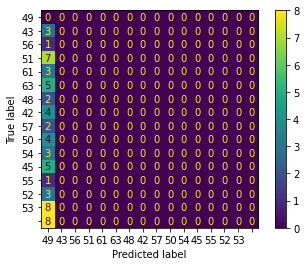

Etiquetas: [52 51 53 63 63 50 45 61 54 53]
Predicciones: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
X = dfHU.drop(columns=["Label"])
y = dfHU["Label"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 123)

y_Est,y_Est_Test = Modelo_MinCuadrados(dfHU,"Label", Xtrain,Xtest,ytrain,ytest)
acc = accuracy_score(ytest,y_Est_Test)
print('\n Acc(%): ',acc*100)

cMat = confusion_matrix(ytest,y_Est)
ax = ConfusionMatrixDisplay(cMat, display_labels=dfHU['Label'].unique())
ax.plot()
plt.show()

#Mostremos las observaciones en las que el modelo se equivoco
print('Etiquetas:', ytest[:10].to_numpy())
print('Predicciones:', y_Est_Test[:10])

### Modelo Discriminativo - Regresión Logística

In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
X = dfHU.drop(columns=["Label"])
y = dfHU["Label"]

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, :-1].values)
X = imputer.transform(X.iloc[:, :-1].values)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 123)

@interact(Penalidad = ['l1', 'l2', 'elasticnet'], solver = ['lbfgs', 'liblinear', 'saga'], C = [1e-2,100,1e6], max_iter=[100,1000,5e6])
def Discriminativo(Penalidad='l1', solver='liblinear', C= 1e6, max_iter=5e6):
  model_LR = LogisticRegression(penalty=Penalidad, C=C,max_iter=max_iter,solver=solver)
  model_LR.fit(Xtrain,ytrain)
  yEst = model_LR.predict(Xtest)
  Acc_test = accuracy_score(ytest, yEst)
  print('\n Precision de la Clasificación: ',Acc_test*100)
  cmat = confusion_matrix(ytest,yEst)
  ax = ConfusionMatrixDisplay(cmat,display_labels=dfHU["Label"].unique())
  ax.plot()
  plt.show()

interactive(children=(Dropdown(description='Penalidad', options=('l1', 'l2', 'elasticnet'), value='l1'), Dropd…

## Máquinas de Soporte Vectorial

In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
X = dfHU.drop(columns=["Label"])
X = scale(X)
y = dfHU["Label"]


Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 123)
@interact(kernel = ['linear','rbf','poly','sigmoid'],C = [0.01,1,10,100,1e6],Deg =[2,3,6])
def SVMclass(kernel='linear',C=100,Deg=2):
  model = SVC(kernel=kernel,C=C,degree=Deg)
  model.fit(Xtrain,ytrain)
  yEst = model.predict(Xtest)
  Acc_test = accuracy_score(ytest, yEst)
  
  print("\n Con el Kernel:", kernel)
  print("\n Con Regulariacion:", C)
  print("\n Con Grados para el kernel polinómico:", Deg)

  # Evaluamos el desempeño del clasificador 
  target_names = dfHU['Label'].unique()
  print('\n Precision de la Clasificación: ',Acc_test*100)
  #print("\n Evaluamos el comportamiento de la prediccion \n", classification_report(ytest, yEst, target_names=target_names))
  cMat_test = confusion_matrix(ytest, yEst)

  ax = ConfusionMatrixDisplay(cMat_test, display_labels = target_names)
  ax.plot()
  plt.show()

interactive(children=(Dropdown(description='kernel', options=('linear', 'rbf', 'poly', 'sigmoid'), value='line…

## Redes Neuronales

In [ ]:
dfHU= pd.read_excel('dfHU.xlsx')
X = dfHU.drop(columns=["Label"])
X = scale(X)
y = dfHU["Label"]

Xtrain, Xtest, yTrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 123)

@interact(Ver_Train = [True, False], Capas = [10,50,100],alpha=[1e-6,1e-2,10], Max_Iter=[100,1000,5000])
def ANN(Ver_Train=False, Capas=50,alpha = 1e-2, Max_Iter=5000):
  verbose =  Ver_Train
  model = MLPClassifier(hidden_layer_sizes=Capas,alpha=alpha, verbose=Ver_Train, max_iter=Max_Iter)
  model.fit(Xtrain,yTrain)

  if verbose==True:
    #Visualicemos el entrenamiento#verbose=True,
    loss = model.loss_curve_
    plt.plot(loss, '-r')
    plt.ylabel('Perdida por Iteracion')
    plt.ylabel('Iteracion')
    plt.show()


  #Observamos el comportamiento
  yEst = model.predict(Xtest)
  print('Acc: ', (accuracy_score(ytest, yEst)*100))
  cMat = confusion_matrix(ytest, yEst)
  ax = ConfusionMatrixDisplay(cMat,display_labels=dfHU["Label"].unique())
  ax.plot()
  plt.show()


interactive(children=(Dropdown(description='Ver_Train', index=1, options=(True, False), value=False), Dropdown…

## PCA

In [ ]:
@interact(M =[3,5,7])
def ExpPCA(M=3):
  X = dfHU.drop(columns=["Label"])
  modelPCA = PCA(n_components=M)
  modelPCA.fit(X)
  X_nuevo = modelPCA.transform(X)#Reescribo la variable
  print(X_nuevo)
  HOG_PCA_M = pd.DataFrame(X_nuevo)
  HOG_PCA_M["Etiquetas"] = dfHU["Label"]
  HOG_PCA_M.to_excel(f"HU_PCA_{M}.xlsx", index=False)
  HOG_PCA_M.head()

interactive(children=(Dropdown(description='M', options=(3, 5, 7), value=3), Output()), _dom_classes=('widget-…